# CIS 4120 - Group Project
### Group 3
### Chen, Xianglin (Xianglin.Chen@baruchmail.cuny.edu)

# Step 1: Data Info
## (1) Loading perfume comments data from kaggle using csv
https://www.kaggle.com/datasets/nandini1999/perfume-recommendation-dataset

In [1]:
# using pandas to load the data
import pandas as pd
perfume = pd.read_csv('final_perfume_data.csv', encoding= 'unicode_escape')
perfume.head()

,Name,Brand,Description,Notes,Image URL
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...","Vanilla bean, musks",https://static.luckyscent.com/images/products/...
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,"Green yuzu, green shikuwasa, sansho seed, cor...",https://static.luckyscent.com/images/products/...
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,"tangerine, pink pepper, black coffee, leat...",https://static.luckyscent.com/images/products/...
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...


## (2) Information about the perfume comments 

In [2]:
import regex as re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize
from nltk import RegexpTokenizer
tokenizer_re = RegexpTokenizer("[\w]+")

In [3]:
# Shape of the data: The raw data has 2191 rows of data
print("Shape of perfume dataset:", perfume.shape)

# The number of product name 
print ("The number of perfume:", perfume['Name'].nunique())

# The number of product name 
print ("The number of brand:", perfume['Brand'].nunique())

# The column name of dataset
print ("Column Names",perfume.columns.values)

# Name = Name of the perfume;
# Brand = Brand or Company to which the perfume belongs to;
# Description = Some text describing the feel and features of the perfume;
# Notes = A list of fragrance notes present in the perfume;
# Image URL = URL of the perfume image

Shape of perfume dataset: (2191, 5)
The number of perfume: 2184
The number of brand: 249
Column Names ['Name' 'Brand' 'Description' 'Notes' 'Image URL']


In [4]:
# clean the notes column in perfume
perfume["Notes"] = perfume["Notes"].str.lower()
perfume.dropna(inplace = True)
perfume['Notes']= perfume['Notes'].map(tokenizer_re.tokenize)

In [5]:
notes = []
count = 0 
for i in perfume['Notes']:
    for n in i:
        n = n.replace(" ", "")
        count += 1 # count how many notes for all the perfume
        if n not in notes:
            notes.append(n)
            
print("number of unique notes:", len(notes)) # final number of perfume on the list
print("number of notes:", count)

number of unique notes: 1869
number of notes: 27977


# Step 2: Data PreProcessing: cleaning the "Description" column in the data 

In [6]:
# Create a function to clean the description which is the "comments" for each perfume
def cleaning(text): 
    text = re.sub(r'http\S+', ' ', text) # remove URLs
    text = re.sub('[^A-Za-z]+', ' ', text) # remove emojis and strange words
    return text 

In [7]:
# Drop the nan rows to apply cleaning function
perfume.dropna(inplace=True)

# apply cleaning function
perfume['cleaned_text'] = perfume['Description'].apply(cleaning)

# apply lower-case function
perfume['cleaned_text'] = perfume['cleaned_text'].str.lower()

perfume.head()

,Name,Brand,Description,Notes,Image URL,cleaned_text
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...","[vanilla, bean, musks]",https://static.luckyscent.com/images/products/...,rapa nui for sugar tihota is quite simply the...
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"[lavender, yuzu, lemongrass, magnolia, geraniu...",https://static.luckyscent.com/images/products/...,a tribute to the expanse of space extending f...
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,"[green, yuzu, green, shikuwasa, sansho, seed, ...",https://static.luckyscent.com/images/products/...,an aromatic ode to the ancient beauty of japa...
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,"[tangerine, pink, pepper, black, coffee, leath...",https://static.luckyscent.com/images/products/...,velvet fantasy is a solar fragrance where cit...
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"[bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...,there s no way a lab on fire could relocate t...


In [8]:
perfume['cleaned_text']= perfume['cleaned_text'].map(tokenizer_re.tokenize)
# print (perfume.iloc[100:120,:])

In [9]:
# removing stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk_stop_words = stopwords.words('english')

# remove the word in stop-words list and is less than two letters
perfume['cleaned_text'] = perfume['cleaned_text'].apply(lambda words: [word for word in words if word not in nltk_stop_words and len(word)>2])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xianglinchen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# convert the tokens into sentences 
perfume['new_sentence'] = perfume['cleaned_text'].apply(lambda x: (' '.join(x)))
perfume.head()

,Name,Brand,Description,Notes,Image URL,cleaned_text,new_sentence
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...","[vanilla, bean, musks]",https://static.luckyscent.com/images/products/...,"[rapa, nui, sugar, tihota, quite, simply, one,...",rapa nui sugar tihota quite simply one one cal...
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"[lavender, yuzu, lemongrass, magnolia, geraniu...",https://static.luckyscent.com/images/products/...,"[tribute, expanse, space, extending, sky, flow...",tribute expanse space extending sky flower fru...
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,"[green, yuzu, green, shikuwasa, sansho, seed, ...",https://static.luckyscent.com/images/products/...,"[aromatic, ode, ancient, beauty, japan, kagiro...",aromatic ode ancient beauty japan kagiroi repr...
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,"[tangerine, pink, pepper, black, coffee, leath...",https://static.luckyscent.com/images/products/...,"[velvet, fantasy, solar, fragrance, citrus, ve...",velvet fantasy solar fragrance citrus velvety ...
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"[bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...,"[way, lab, fire, could, relocate, los, angeles...",way lab fire could relocate los angeles pay tr...


# Step 3: Application of vader
## (1) Vader

In [11]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [12]:
# using a function to return the polarity scores of the cleaned sentences
def vader_score(text):
  return analyzer.polarity_scores(text)

# apply the function to the dataset
perfume['vader_score']= perfume['new_sentence'].apply(vader_score)

print(perfume)

                                     Name                   Brand  \
0                    Tihota Eau de Parfum                  Indult   
1                             Sola Parfum                  Di Ser   
2                          Kagiroi Parfum                  Di Ser   
3            Velvet Fantasy Eau de Parfum                 Montale   
4     A Blvd. Called Sunset Eau de Parfum           A Lab on Fire   
...                                   ...                     ...   
2186           Perfect Veil Eau de Parfum  Sarah Horowitz Parfums   
2187                  Scent Eau de Parfum        Costume National   
2188                 Bronze Eau de Parfum              Nanadebary   
2189         Monyette Paris Fragrance Oil          Monyette Paris   
2190                   1270 Eau de Parfum                  Frapin   

                                            Description  \
0      Rapa Nui for sugar, Tihota is, quite simply, ...   
1      A tribute to the expanse of space extending f.

In [13]:
# Apply the result of algorism into the dataset
perfume['vader_compound'] = perfume['vader_score'].apply(lambda score_dict: score_dict['compound'])
perfume['vader_negative'] = perfume['vader_score'].apply(lambda score_dict: score_dict['neg'])
perfume['vader_neutral'] = perfume['vader_score'].apply(lambda score_dict: score_dict['neu'])
perfume['vader_positive'] = perfume['vader_score'].apply(lambda score_dict: score_dict['pos'])
print (perfume)

                                     Name                   Brand  \
0                    Tihota Eau de Parfum                  Indult   
1                             Sola Parfum                  Di Ser   
2                          Kagiroi Parfum                  Di Ser   
3            Velvet Fantasy Eau de Parfum                 Montale   
4     A Blvd. Called Sunset Eau de Parfum           A Lab on Fire   
...                                   ...                     ...   
2186           Perfect Veil Eau de Parfum  Sarah Horowitz Parfums   
2187                  Scent Eau de Parfum        Costume National   
2188                 Bronze Eau de Parfum              Nanadebary   
2189         Monyette Paris Fragrance Oil          Monyette Paris   
2190                   1270 Eau de Parfum                  Frapin   

                                            Description  \
0      Rapa Nui for sugar, Tihota is, quite simply, ...   
1      A tribute to the expanse of space extending f.

In [14]:
perfume['comp_label ']=''
perfume.loc[perfume.vader_compound>0,'Sentiment_Type']='POSITIVE'
perfume.loc[perfume.vader_compound==0,'Sentiment_Type']='NEUTRAL'
perfume.loc[perfume.vader_compound<0,'Sentiment_Type']='NEGATIVE'

In [15]:
perfume["Sentiment_Type"]

0       POSITIVE
1       POSITIVE
2       POSITIVE
3       POSITIVE
4       POSITIVE
          ...   
2186    POSITIVE
2187    POSITIVE
2188    POSITIVE
2189    POSITIVE
2190    POSITIVE
Name: Sentiment_Type, Length: 2111, dtype: object

# Step 4: Visualize the Vader result

## The most negative 5 products:
1) La Haine Eau de Parfum -0.9274
2) Tyrannosaurus Rex Extrait de Parfum -0.8876
3) Phloem Eau de Parfum -0.8591
4) Iris Silver Mist Eau de Parfum -0.8390
5) Complex Eau de Parfum -0.8183

## The most positive 5 products:
1) Wonder Of You Eau de Parfum 0.9982
2) Noir Exquis Eau de Parfum 0.9982
3) Elysium Pour Homme Extrait de Parfum 0.9979
4) Fleur de Peau Eau de Parfum 0.9978
5) Royal Sapphire Extrait de Parfum 0.9978

## The most negative 5 brands:
1) Moth and Rabbit 0.409880
2) Nasomatto 0.421500
3) Maison Louis Marie 0.423233
4) Jorum Studio 0.435817
5) Agonist 0.442733

## The most positive 5 brands:
1) Domenico Caraceni 0.99310
2) Antica Barbieria Colla 0.99305
3) Boris Bidjan Saberi 0.99250
4) Panah London 0.99220
5) The Beautiful Mind Series 0.99095

In [16]:
# group by perfume names to calculate the scores
group_perfume = perfume.groupby("Name").mean()
group_perfume

# Filter the values by decending order
perfume.sort_values(by=['vader_compound'], inplace=True)
negativeproduct = perfume.head()

perfume.head()

,Name,Brand,Description,Notes,Image URL,cleaned_text,new_sentence,vader_score,vader_compound,vader_negative,vader_neutral,vader_positive,comp_label,Sentiment_Type
162,La Haine Eau de Parfum,Moth and Rabbit,A contemporary black and white masterpiece di...,"[aldehyde, buchu, leaf, bay, birch, cedar, met...",https://static.luckyscent.com/images/products/...,"[contemporary, black, white, masterpiece, dire...",contemporary black white masterpiece directed ...,"{'neg': 0.25, 'neu': 0.676, 'pos': 0.074, 'com...",-0.9274,0.250,0.676,0.074,,NEGATIVE
849,Tyrannosaurus Rex Extrait de Parfum,Zoologist,"A sultry heat wafts across the land, lapped u...","[bergamot, black, pepper, fir, laurel, leaf, n...",https://static.luckyscent.com/images/products/...,"[sultry, heat, wafts, across, land, lapped, gr...",sultry heat wafts across land lapped greedily ...,"{'neg': 0.192, 'neu': 0.714, 'pos': 0.095, 'co...",-0.8876,0.192,0.714,0.095,,NEGATIVE
450,Phloem Eau de Parfum,Jorum Studio,What a sticky mess. Phloem is a diabolical as...,"[passion, fruit, rhubarb, mulberry, nasturtium...",https://static.luckyscent.com/images/products/...,"[sticky, mess, phloem, diabolical, assemblage,...",sticky mess phloem diabolical assemblage odora...,"{'neg': 0.207, 'neu': 0.677, 'pos': 0.116, 'co...",-0.8591,0.207,0.677,0.116,,NEGATIVE
671,Iris Silver Mist Eau de Parfum,Serge Lutens,"More iris, more, more, more, Serge Lutens fam...","[orris, root, galbanum, sandalwood, cedar, clo...",https://static.luckyscent.com/images/products/...,"[iris, serge, lutens, famously, urged, maurice...",iris serge lutens famously urged maurice rouce...,"{'neg': 0.156, 'neu': 0.749, 'pos': 0.096, 'co...",-0.8390,0.156,0.749,0.096,,NEGATIVE
1977,Complex Eau de Parfum,Boadicea the Victorious,"The mood is Gothic; the scene, a dungeon; the...","[sage, basil, violet, incense, leather, musk, ...",https://static.luckyscent.com/images/products/...,"[mood, gothic, scene, dungeon, scent, unsettli...",mood gothic scene dungeon scent unsettling dip...,"{'neg': 0.17, 'neu': 0.798, 'pos': 0.032, 'com...",-0.8183,0.170,0.798,0.032,,NEGATIVE


In [17]:
# show the notes for the most negarive products
for i in negativeproduct['Notes']: print(i)

['aldehyde', 'buchu', 'leaf', 'bay', 'birch', 'cedar', 'metallic', 'accord', 'leather', 'moss', 'musk']
['bergamot', 'black', 'pepper', 'fir', 'laurel', 'leaf', 'neroli', 'nutmeg', 'champaca', 'geranium', 'jasmine', 'osmanthus', 'rose', 'ylang', 'resins', 'cade', 'cedar', 'civet', 'frankincense', 'leather', 'patchouli', 'sandalwood', 'vanilla']
['passion', 'fruit', 'rhubarb', 'mulberry', 'nasturtium', 'honeysuckle', 'blaeberry', 'camellia', 'oysterplant', 'meadowsweet', 'gorse', 'ambrette', 'sesame', 'amyris', 'tonka', 'bean', 'absolute']
['orris', 'root', 'galbanum', 'sandalwood', 'cedar', 'clove', 'vetiver', 'musk', 'benzoin', 'incense', 'white', 'amber']
['sage', 'basil', 'violet', 'incense', 'leather', 'musk', 'oud']


In [18]:
# Filter the values by ascending order
perfume.sort_values(by=['vader_compound'], inplace=True, ascending=False)
positiveproduct = perfume.head()

perfume.head()

,Name,Brand,Description,Notes,Image URL,cleaned_text,new_sentence,vader_score,vader_compound,vader_negative,vader_neutral,vader_positive,comp_label,Sentiment_Type
536,Wonder Of You Eau de Parfum,ALTAIA,"We all love gigantic, luxuriously romantic sc...","[blackcurrant, pink, grapefruit, freesia, wate...",https://static.luckyscent.com/images/products/...,"[love, gigantic, luxuriously, romantic, scents...",love gigantic luxuriously romantic scents kind...,"{'neg': 0.026, 'neu': 0.416, 'pos': 0.558, 'co...",0.9982,0.026,0.416,0.558,,POSITIVE
1421,Noir Exquis Eau de Parfum,L'Artisan Parfumeur,The Parisian patisserie is so much more than ...,"[chestnut, orange, orange, blossom, coffee, ma...",https://static.luckyscent.com/images/products/...,"[parisian, patisserie, much, simple, shop, pla...",parisian patisserie much simple shop place won...,"{'neg': 0.012, 'neu': 0.515, 'pos': 0.473, 'co...",0.9982,0.012,0.515,0.473,,POSITIVE
1038,Elysium Pour Homme Extrait de Parfum,Roja Parfums,"Drawn from Greek legend, the Elysian Fields a...","[lemon, bergamot, grapefruit, lime, lavender, ...",https://static.luckyscent.com/images/products/...,"[drawn, greek, legend, elysian, fields, eterna...",drawn greek legend elysian fields eternal rewa...,"{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...",0.9979,0.000,0.488,0.512,,POSITIVE
584,Royal Sapphire Extrait de Parfum,Thameen,The Imperial State Crown and Sceptre of the U...,"[bergamot, mandarin, orange, blossom, jasmine,...",https://static.luckyscent.com/images/products/...,"[imperial, state, crown, sceptre, united, king...",imperial state crown sceptre united kingdom pr...,"{'neg': 0.0, 'neu': 0.458, 'pos': 0.542, 'comp...",0.9978,0.000,0.458,0.542,,POSITIVE
936,Fleur de Peau Eau de Parfum,Diptyque,As part of Diptyque's 50th anniversary celebr...,"[aldehydes, pink, pepper, rose, iris, ambrette...",https://static.luckyscent.com/images/products/...,"[part, diptyque, anniversary, celebration, fle...",part diptyque anniversary celebration fleur pe...,"{'neg': 0.009, 'neu': 0.557, 'pos': 0.434, 'co...",0.9978,0.009,0.557,0.434,,POSITIVE


In [19]:
for i in positiveproduct['Notes']: print(i)

['blackcurrant', 'pink', 'grapefruit', 'freesia', 'watermelon', 'ambrox', 'musk']
['chestnut', 'orange', 'orange', 'blossom', 'coffee', 'maple', 'syrup', 'ebony', 'heliotrope', 'vanilla', 'tonka', 'sandalwood']
['lemon', 'bergamot', 'grapefruit', 'lime', 'lavender', 'thyme', 'artemisia', 'musk', 'lily', 'of', 'the', 'valley', 'rose', 'de', 'mai', 'jasmine', 'apple', 'blackcurrant', 'galbanum', 'pink', 'pepper', 'cypriol', 'vetiver', 'cedarwood', 'juniper', 'benzoin', 'vanilla', 'labdanum', 'leather', 'ambergris', 'musk']
['bergamot', 'mandarin', 'orange', 'blossom', 'jasmine', 'ambergris', 'patchouli', 'moss', 'amber', 'dry', 'wood']
['aldehydes', 'pink', 'pepper', 'rose', 'iris', 'ambrette', 'ambergris', 'musk']


In [20]:
# grouping by brand and calculate the average score
group_perfume = perfume.groupby("Brand").mean()
group_perfume

,vader_compound,vader_negative,vader_neutral,vader_positive
Brand,,,,
10 Corso Como,0.950900,0.045000,0.674000,0.281000
19-69,0.905689,0.030444,0.760111,0.209444
4160 Tuesdays,0.978387,0.033800,0.619467,0.346733
A Lab on Fire,0.983869,0.040000,0.623615,0.336308
ALTAIA,0.987900,0.019000,0.521250,0.459750
...,...,...,...,...
Xerjoff - Join the Club,0.968400,0.097500,0.562000,0.340000
Xerjoff - XJ Oud Attars,0.727980,0.036600,0.737800,0.225200
Xinu,0.952160,0.043200,0.749400,0.207600


In [21]:
# Filter the values by decending order
group_perfume.sort_values(by=['vader_compound'], inplace=True)
group_perfume.head()

,vader_compound,vader_negative,vader_neutral,vader_positive
Brand,,,,
Moth and Rabbit,0.409880,0.121600,0.651800,0.226600
Nasomatto,0.421500,0.092000,0.789000,0.119000
Maison Louis Marie,0.423233,0.000000,0.816111,0.183889
Jorum Studio,0.435817,0.095667,0.723500,0.180833
Agonist,0.442733,0.028667,0.809667,0.161667


In [22]:
# Filter the values by ascending order
group_perfume.sort_values(by=['vader_compound'], inplace=True, ascending=False)
group_perfume.head()

,vader_compound,vader_negative,vader_neutral,vader_positive
Brand,,,,
Domenico Caraceni,0.99310,0.0000,0.6610,0.3390
Antica Barbieria Colla,0.99305,0.0320,0.5585,0.4095
Boris Bidjan Saberi,0.99250,0.0330,0.6220,0.3440
Panah London,0.99220,0.0180,0.5935,0.3890
The Beautiful Mind Series,0.99095,0.0155,0.6665,0.3180


# Latent Dirichlet Allocation (LDA)


In [23]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/xianglinchen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/xianglinchen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [24]:
perfume.head()

,Name,Brand,Description,Notes,Image URL,cleaned_text,new_sentence,vader_score,vader_compound,vader_negative,vader_neutral,vader_positive,comp_label,Sentiment_Type
536,Wonder Of You Eau de Parfum,ALTAIA,"We all love gigantic, luxuriously romantic sc...","[blackcurrant, pink, grapefruit, freesia, wate...",https://static.luckyscent.com/images/products/...,"[love, gigantic, luxuriously, romantic, scents...",love gigantic luxuriously romantic scents kind...,"{'neg': 0.026, 'neu': 0.416, 'pos': 0.558, 'co...",0.9982,0.026,0.416,0.558,,POSITIVE
1421,Noir Exquis Eau de Parfum,L'Artisan Parfumeur,The Parisian patisserie is so much more than ...,"[chestnut, orange, orange, blossom, coffee, ma...",https://static.luckyscent.com/images/products/...,"[parisian, patisserie, much, simple, shop, pla...",parisian patisserie much simple shop place won...,"{'neg': 0.012, 'neu': 0.515, 'pos': 0.473, 'co...",0.9982,0.012,0.515,0.473,,POSITIVE
1038,Elysium Pour Homme Extrait de Parfum,Roja Parfums,"Drawn from Greek legend, the Elysian Fields a...","[lemon, bergamot, grapefruit, lime, lavender, ...",https://static.luckyscent.com/images/products/...,"[drawn, greek, legend, elysian, fields, eterna...",drawn greek legend elysian fields eternal rewa...,"{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...",0.9979,0.000,0.488,0.512,,POSITIVE
584,Royal Sapphire Extrait de Parfum,Thameen,The Imperial State Crown and Sceptre of the U...,"[bergamot, mandarin, orange, blossom, jasmine,...",https://static.luckyscent.com/images/products/...,"[imperial, state, crown, sceptre, united, king...",imperial state crown sceptre united kingdom pr...,"{'neg': 0.0, 'neu': 0.458, 'pos': 0.542, 'comp...",0.9978,0.000,0.458,0.542,,POSITIVE
936,Fleur de Peau Eau de Parfum,Diptyque,As part of Diptyque's 50th anniversary celebr...,"[aldehydes, pink, pepper, rose, iris, ambrette...",https://static.luckyscent.com/images/products/...,"[part, diptyque, anniversary, celebration, fle...",part diptyque anniversary celebration fleur pe...,"{'neg': 0.009, 'neu': 0.557, 'pos': 0.434, 'co...",0.9978,0.009,0.557,0.434,,POSITIVE


In [25]:
# create the dictionary for corpora
dictionary = gensim.corpora.Dictionary(perfume['cleaned_text'])

# Filter out tokens that appear in
# less than 50 documents (absolute number) since there's only about 2000 documents
# more than 0.9 documents (fraction of total corpus size, not absolute number).
dictionary.filter_extremes(no_below = 50 , no_above=0.90)
print (len(dictionary))

# process the tokens in dictionary into vectors
bow_perfume = [dictionary.doc2bow(doc) for doc in perfume['cleaned_text']]

602


In [26]:
#create tf-idf model.
from gensim import corpora, models
tfidf = models.TfidfModel(bow_perfume)
corpus_tfidf = tfidf[bow_perfume]
from pprint import pprint
for doc in corpus_tfidf:
    print(doc)
    break

[(0, 0.0874390028708773), (1, 0.08865511313365151), (2, 0.0696853625987602), (3, 0.07079245081967389), (4, 0.0927406737841682), (5, 0.21389717905814332), (6, 0.10097678888775839), (7, 0.09177435510312117), (8, 0.1264880052060509), (9, 0.10779852476219576), (10, 0.08830381779736689), (11, 0.12837028785447777), (12, 0.1274179414080157), (13, 0.15421949165685586), (14, 0.0899098364577406), (15, 0.1055714304992746), (16, 0.13878727071566052), (17, 0.13351004797210195), (18, 0.05301152682875697), (19, 0.09293680552722142), (20, 0.2387184736829718), (21, 0.13635447415301538), (22, 0.19773080290427725), (23, 0.48415469176085035), (24, 0.12255454930553865), (25, 0.13878727071566052), (26, 0.10295322396930989), (27, 0.0645722389080471), (28, 0.147138304379759), (29, 0.1083754761053948), (30, 0.05044751266412442), (31, 0.07568659658863525), (32, 0.14344211106709032), (33, 0.10320737574624647), (34, 0.10397978727347415), (35, 0.14637089259510386), (36, 0.13242722776859917), (37, 0.111081355378027

In [27]:
# top 8 keywords along with a probability for each keyword
from gensim.models import CoherenceModel
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics= 6, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)

In [28]:
# The following are the 6 words for each topic
# and show corresponding top 6 keywords along with a probability for each keyword for each topic.

for idx, topic in lda_model_tfidf.print_topics(-1, num_words=6):
    #print out topic numbers and keywords.
    print('Topic: {} Word: {} \n'.format(idx, topic))

Topic: 0 Word: 0.006*"musk" + 0.005*"green" + 0.005*"white" + 0.005*"tea" + 0.005*"fragrance" + 0.005*"fresh" 

Topic: 1 Word: 0.008*"rose" + 0.006*"vetiver" + 0.005*"rich" + 0.005*"vanilla" + 0.005*"fragrance" + 0.005*"sweet" 

Topic: 2 Word: 0.013*"oud" + 0.006*"scent" + 0.006*"rose" + 0.005*"fragrance" + 0.005*"floral" + 0.005*"fresh" 

Topic: 3 Word: 0.009*"rose" + 0.006*"green" + 0.005*"leather" + 0.005*"amber" + 0.005*"notes" + 0.005*"fresh" 

Topic: 4 Word: 0.008*"patchouli" + 0.006*"chocolate" + 0.006*"vanilla" + 0.006*"dark" + 0.005*"amber" + 0.005*"like" 

Topic: 5 Word: 0.011*"oud" + 0.006*"vanilla" + 0.005*"scent" + 0.005*"notes" + 0.005*"like" + 0.005*"incense" 



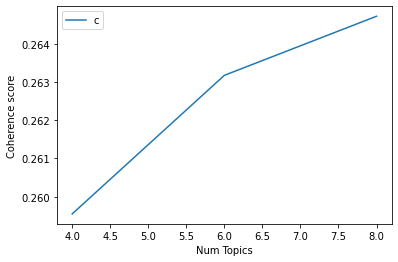

Num Topics = 4  has Coherence Value of 0.2595
Num Topics = 6  has Coherence Value of 0.2632
Num Topics = 8  has Coherence Value of 0.2647


In [41]:
import matplotlib.pyplot as plt
def compute_coherence_values(dictionary, corpus, texts, limit, start=4, step=2):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =  gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, eta='auto', iterations=100,
                                             random_state=100, alpha='symmetric', passes=2, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts = perfume['cleaned_text'], dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts= perfume['cleaned_text'], start=4, limit=10, step=2)

# Show graph
limit=10; start=4; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [30]:
import re
for idx, topic in lda_model_tfidf.print_topics(-1, num_words=6):
    #print out topic numbers and keywords.
    key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    print ('Topic:',idx,key_words_only)

Topic: 0 musk green white tea fragrance fresh
Topic: 1 rose vetiver rich vanilla fragrance sweet
Topic: 2 oud scent rose fragrance floral fresh
Topic: 3 rose green leather amber notes fresh
Topic: 4 patchouli chocolate vanilla dark amber like
Topic: 5 oud vanilla scent notes like incense


In [31]:
for idx, topic in lda_model_tfidf.print_topics(-1, num_words=8):
    #print out topic numbers and keywords.
    key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    print ('Topic:',idx,key_words_only)

Topic: 0 musk green white tea fragrance fresh like sweet
Topic: 1 rose vetiver rich vanilla fragrance sweet light scent
Topic: 2 oud scent rose fragrance floral fresh patchouli one
Topic: 3 rose green leather amber notes fresh like fragrance
Topic: 4 patchouli chocolate vanilla dark amber like green sweet
Topic: 5 oud vanilla scent notes like incense skin jasmine


In [32]:
# set up list to process in the topic number for each topic and possibility
list_in_list=[]
sum_list = []

#for the first 10 documents.
doc_topics = lda_model_tfidf.get_document_topics(corpus_tfidf[:11])

for each_doc in doc_topics:
    
    top_topic = sorted(each_doc, key=lambda x: x[1], reverse=True)[0]
    
    top_topic_num=top_topic[0]
    top_topic_prob=top_topic[1]
    
    list=[top_topic_num,top_topic_prob]
    list_in_list.extend([list]) 
    sum_list.append(top_topic_num)
    
#create pandas dataframe with column names.
df = pd.DataFrame(list_in_list, columns = ['Dominant Topic', 'Probability']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
print (df)

# Count the frequency of dominant topics 
sum_df = pd.DataFrame(sum_list, columns = ['Dominant Topic'])
result = sum_df['Dominant Topic'].value_counts().rename_axis('Dominant Topic').reset_index(name='Frequency')
result = result.sort_values(by = 'Dominant Topic', ascending=True)
print(result)

    Dominant Topic  Probability
0                1     0.885606
1                1     0.902129
2                2     0.894372
3                0     0.888527
4                2     0.897070
5                1     0.891624
6                1     0.885514
7                3     0.886957
8                1     0.894205
9                1     0.891838
10               1     0.885047
   Dominant Topic  Frequency
2               0          1
0               1          7
1               2          2
3               3          1


In [33]:
# Count the frequency for all the documents
sum_list = []

doc_topics = lda_model_tfidf.get_document_topics(corpus_tfidf[0:])

for each_doc in doc_topics:
    
    top_topic = sorted(each_doc, key=lambda x: x[1], reverse=True)[0]
    top_topic_num=top_topic[0]
    sum_list.append(top_topic_num)
    
# Count the frequency of dominant topics 
sum_df = pd.DataFrame(sum_list, columns = ['Dominant Topic'])
result = sum_df['Dominant Topic'].value_counts().rename_axis('Dominant Topic').reset_index(name='Frequency')
result = result.sort_values(by = 'Dominant Topic', ascending=True)
print(result)

   Dominant Topic  Frequency
2               0        263
0               1        742
3               2        261
5               3        225
4               4        252
1               5        368


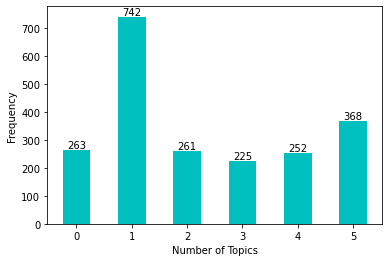

In [34]:
# graph
plt.bar(result['Dominant Topic'], result['Frequency'], color="c",width=0.5)

plt.xlabel("Number of Topics")
plt.ylabel("Frequency")

for i in range(len(result['Frequency'])):
    plt.annotate(str(result['Frequency'][i]), xy=(result['Dominant Topic'][i],result['Frequency'][i]), ha='center', va='bottom')

plt.show()

In [39]:
perfume[perfume["Brand"]=="Moth and Rabbit"]

,Name,Brand,Description,Notes,Image URL,cleaned_text,new_sentence,vader_score,vader_compound,vader_negative,vader_neutral,vader_positive,comp_label,Sentiment_Type
203,Love Exposure Eau de Parfum,Moth and Rabbit,Le Cinema Olfactif is a creative collaboratio...,"[ylang, magnolia, flowers, neroli, oil, cassis...",https://static.luckyscent.com/images/products/...,"[cinema, olfactif, creative, collaboration, so...",cinema olfactif creative collaboration soho ho...,"{'neg': 0.078, 'neu': 0.591, 'pos': 0.331, 'co...",0.9904,0.078,0.591,0.331,,POSITIVE
97,Dolls Eau de Parfum,Moth and Rabbit,"""A fragrance carried by vivid, extravagant co...","[cherry, blossom, geranium, davana, orange, bl...",https://static.luckyscent.com/images/products/...,"[fragrance, carried, vivid, extravagant, colou...",fragrance carried vivid extravagant colours su...,"{'neg': 0.088, 'neu': 0.58, 'pos': 0.332, 'com...",0.9861,0.088,0.580,0.332,,POSITIVE
202,Mood Indigo Eau de Parfum,Moth and Rabbit,"For Mood Indigo, perfumer Mark Buxton was ins...","[red, pepper, camomile, romaine, geranium, wat...",https://static.luckyscent.com/images/products/...,"[mood, indigo, perfumer, mark, buxton, inspire...",mood indigo perfumer mark buxton inspired mich...,"{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp...",0.9231,0.000,0.808,0.192,,POSITIVE
100,Single Man Eau de Parfum,Moth and Rabbit,"It is the gay man that got me curious, troubl...","[cardamom, ginger, oil, red, pepper, winter, l...",https://static.luckyscent.com/images/products/...,"[gay, man, got, curious, troubled, ordinary, g...",gay man got curious troubled ordinary grief ha...,"{'neg': 0.192, 'neu': 0.604, 'pos': 0.204, 'co...",0.0772,0.192,0.604,0.204,,POSITIVE
162,La Haine Eau de Parfum,Moth and Rabbit,A contemporary black and white masterpiece di...,"[aldehyde, buchu, leaf, bay, birch, cedar, met...",https://static.luckyscent.com/images/products/...,"[contemporary, black, white, masterpiece, dire...",contemporary black white masterpiece directed ...,"{'neg': 0.25, 'neu': 0.676, 'pos': 0.074, 'com...",-0.9274,0.250,0.676,0.074,,NEGATIVE
